<a href="https://colab.research.google.com/github/Neket27/basic-examples-of-neural-networks/blob/main/lr4_zd1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from tensorflow.keras.datasets import mnist

# Загрузка данных
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Находим индексы изображений с цифрой 0
zero_indices = np.where(y_train == 0)[0]

# Выводим 5 примеров цифры 0
for i in range(5):
    idx = zero_indices[i]
    print(f'--- Пример цифры 0 #{i+1} ---')
    for line in x_train[idx]:
        for num in line:
            # Порог для "яркости": > 0 или, например, > 100 — чтобы избежать шума
            if num > 100:
                print('*', end='')
            else:
                print(' ', end='')
        print()  # новая строка
    print('--- Конец примера ---\n')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
--- Пример цифры 0 #1 ---
                            
                            
                            
                            
                ***         
               *****        
              ******        
             ***** ***      
           ******* ***      
           *******  **      
          ****  *   **      
         ****       ***     
        ***         ***     
        **          ***     
       ***          ***     
       ***          ***     
       **          ***      
       **         ***       
       **        ***        
       **      ****         
       ***   *****          
       **********           
       ********             
        *****               
                            
                            
                            
                            
--- Конец примера ---

--- Пример цифры 0 #2 ---
                            
                            
    

ЗД_2

Saving figure some_digit_plot


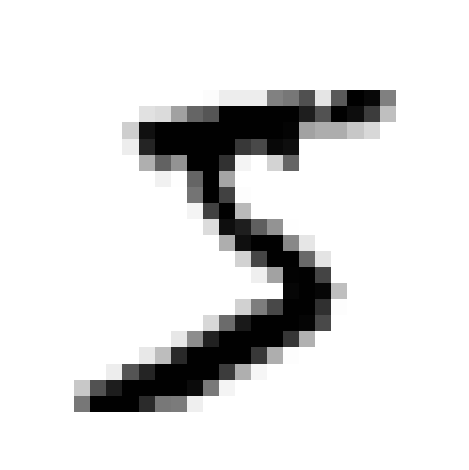

Saving figure more_digits_plot


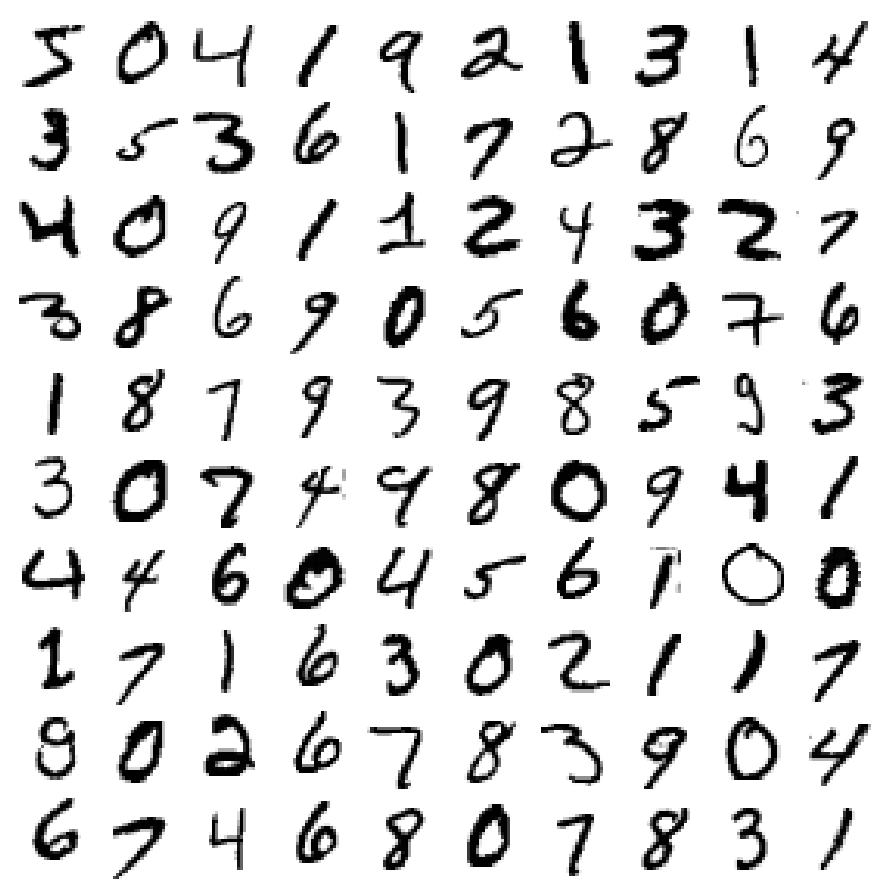

In [4]:
import sys

assert sys.version_info >= (3, 5)  # Проверяем версию Python

# Проверяем, запущен ли данный документ в Colab или Kaggle
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Требуется версия Scikit-Learn ≥ 0.20
import sklearn

assert sklearn.__version__ >= "0.20"  # Проверяем версию scikit-learn

# импортируем общие библиотеки
import numpy as np  # Для работы с массивами и математическими операциями
import os  # Для работы с файловой системой

# для стабильного запуска примера более одного раза
np.random.seed(42)  # Устанавливаем seed для воспроизводимости результатов

# Рисуем симпатичные рисунки %matplotlib inline  # Графики будут отображаться в ноутбуке
import matplotlib as mpl
import matplotlib.pyplot as plt

# Настраиваем размеры шрифтов для графиков
mpl.rc('axes', labelsize=14)  # Размер шрифта для подписей осей
mpl.rc('xtick', labelsize=12)  # Размер шрифта для меток оси X
mpl.rc('ytick', labelsize=12)  # Размер шрифта для меток оси Y

# Указываем куда сохранять рисунки
PROJECT_ROOT_DIR = "."  # Корневая директория проекта
CHAPTER_ID = "classification"  # Имя раздела
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)  # Формируем путь для сохранения изображений
os.makedirs(IMAGES_PATH, exist_ok=True)  # Создаем директорию, если она не существует


# Функция для сохранения рисунков
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    # Формируем путь для сохранения файла
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)  # Выводим сообщение о сохранении
    if tight_layout:
        plt.tight_layout()  # Автоматически регулируем отступы для красивого расположения элементов
    # Сохраняем изображение с заданным разрешением
    plt.savefig(path, format=fig_extension, dpi=resolution)


# Загружаем датасет MNIST
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)  # Загружаем MNIST через sklearn
mnist.keys()  # Просматриваем структуру данных (обычно содержит 'data' и 'target')

# Извлекаем признаки и метки
X, y = mnist["data"], mnist["target"]  # X - изображения, y - метки
X.shape  # Просматриваем размер матрицы признаков (70000 изображений по 784 пикселя)
y.shape  # Просматриваем размер вектора меток (70000 меток)

# 28*28 - стандартный размер изображений в MNIST (28 пикселей в высоту и ширину)

# Визуализируем первую цифру из набора
some_digit = X[0]  # Берем первое изображение
some_digit_image = some_digit.reshape(28, 28)  # Преобразуем в двумерный массив 28x28
plt.imshow(some_digit_image, cmap=mpl.cm.binary)  # Отображаем изображение в черно-белых тонах
plt.axis("off")  # Скрываем оси координат

# save_fig("some_digit_plot") - сохраняем изображение в файл
save_fig("some_digit_plot")
plt.show()  # Отображаем график

# y[0] - просматриваем метку для первого изображения
y[0]

# y = y.astype(np.uint8) - преобразуем метки в целочисленный формат
y = y.astype(np.uint8)


# Функция для отображения одной цифры
def plot_digit(data):
    image = data.reshape(28, 28)  # Преобразуем одномерный массив в двумерное изображение
    # Отображаем изображение с ближайшей интерполяцией для сохранения четкости
    plt.imshow(image, cmap=mpl.cm.binary, interpolation="nearest")
    plt.axis("off")  # Скрываем оси координат


# Выводим много цифр...
def plot_digits(instances, images_per_row=10, **options):
    size = 28  # Размер изображения в пикселях
    images_per_row = min(len(instances), images_per_row)  # Количество изображений в строке

    # Вычисляем количество строк, необходимое для размещения всех изображений
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Добавляем пустые изображения для заполнения сетки
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Изменяем форму массива для создания сетки изображений
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Комбинируем измерения массива для создания единой большой картинки
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size, images_per_row * size)

    # Отображаем большую картинку со всеми цифрами
    plt.imshow(big_image, cmap=mpl.cm.binary, **options)
    plt.axis("off")  # Скрываем оси координат


# Создаем фигуру размером 9x9 дюймов
plt.figure(figsize=(9, 9))
example_images = X[:100]  # Берем первые 100 изображений
plot_digits(example_images, images_per_row=10)  # Отображаем их в сетке 10x10
save_fig("more_digits_plot")  # Сохраняем изображение
plt.show()  # Отображаем график